# Introduction
Breast cancer is one of the most common cancer in women and the second leading cause of women’s cancer death.In order to increase the accuracy of breast cancer diagnosis, we aim to use machine learning models.Breast Cancer Wisconsin is a widely used dataset provided by UC Irvine machine learning repository. In this project, we will train our models using this dataset.The input of our algorithm is a set of features calculated from a digitized image of the Fine Needle Aspiration (FNA) of a breast mass from a patient. We will then use four traditional methods including Logistic Regression, Random Forest Algorithm,SVM and KNN Model.

# Social Benefits
It can have various social benefits:<br>
1.ML models can help identify breast cancer at an early stage,increasing the chances of successful treatment and improved survival rates.<br>
2.Early detection can significantly reduce breast cancer related deaths by enabling timely medical interventions.<br>
3.It can bring breast cancer screening to underserved areas and remote locations, making healthcare more accessible.<br>
4.The data collected by such models can contribute to medical research,leading to a deeper understanding of breast cancer and the development of new treatment methods.<br>
5.It can educate patients about their risk factors and encourage proactive health management.

# Importing the libraries
We begin by importing the necessary python libraries required for the machine learning process.

In [1]:
import numpy as np #used for working with arrays.
import pandas as pd #used for working with data sets.
import matplotlib.pyplot as plt #used to create 2D graphs and plots by using python scripts.
import seaborn as sns #used for making statistical graphs.
import warnings #ignore all warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler #for the normalization/standardization.
sc= StandardScaler() #Creating StandardScaler object.
from pandas.plotting import scatter_matrix #draws a matrix of scatter plots.
from sklearn.model_selection import train_test_split #splits the data into random test and train datasets.
from sklearn.linear_model import LogisticRegression #logistic regression classifier used for building the classification model.
from sklearn.metrics import classification_report # a performance evaluation metric.
from sklearn.metrics import accuracy_score # Computes ccuracy classification score.
from sklearn.metrics import precision_score # Computes the precision
from sklearn.metrics import recall_score #Computes the recall
from sklearn.metrics import f1_score #Compute the F1 score, also known as balanced F-score or F-measure.
from sklearn.model_selection import GridSearchCV # Finds the optimal parameter values from a given set of parameters.
from sklearn.model_selection import RepeatedStratifiedKFold
#Repeats Stratified K-Fold n times with different randomization in each repetition.
from sklearn.ensemble import RandomForestClassifier # a random forest classifier.
from sklearn.svm import SVC #C-Support Vector Classification
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote.

## Data Content
1.ID number<br>
2.Diagnosis(M=Malignant,B=Benign)<br>
3.radius(mean of distances from center to points on the parameter)<br>
4.texture(standard deviation of gray-scale values)<br>
5.perimeter<br>
6.area<br>
7.smoothness(local variation in radius lengths)<br>
8.compactness(perimeter^2/area-1.0)<br>
9.concavity(severity of concave portions of the contour)<br>
10.concave points(number of the concave portions of the contour)<br>
11.symmetry<br>
12.farctal dimension("coastline approximation"-1)<br>
13.The mean,standard error and "worst" or largest(mean of the three largest values) of these features were <br>
computed for each image,resulting in 30 features.For instance, dield 3 is Mean Radius,field 13 is Radius SE,<br>
fiels 23 is Worst Radius.<br>
14.All feature values are recorded with four significant digits.<br>
15.Missing attribute values:none<br>
16.Class distribution:357 benign,212 malignant<br>

# EDA and Preprocessing


In [2]:
#reading the dataset and creating a dataframe.
df=pd.read_csv('breastcancer.csv') 

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.shape #Describes the dimensions of the dataset.

(569, 32)

In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

## Observation:
It shows we get two classes after the diagnosis of breast cancer:**M(Malignant) and B(Benign).**

In [6]:
df.diagnosis.value_counts() #Gives the counts of Malignant and Benign diagnosis respectively.

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.info() #Checking for the data types of the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum() #Checking for the null values.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Observation:
1.The above two cells shows that the dataset doesn't contain any null value.<br>
2.The data types of all the features are correct.<br>
3.We have our class label:diagnosis of object data type.<br>
4.We have total 31 featues with float data type.

The 'id' attribute doesn't give any useful information about the dataset and is not helpful in classification.Thus, we drop this column.

In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
df.describe() #generating descriptive statistics.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualization of the Data
Now,since our dataset is clean,we visulaize it to generate more results.

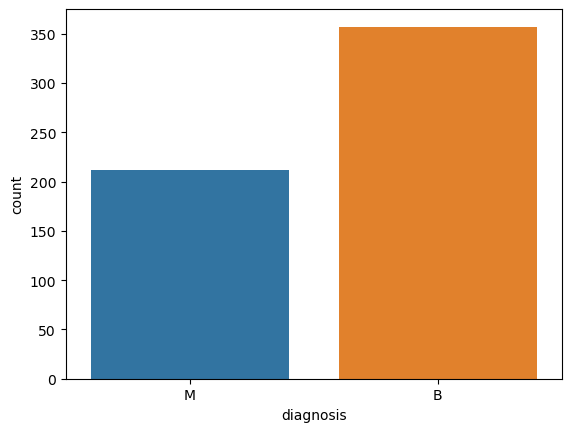

In [11]:
sns.countplot(x=df['diagnosis']) #shows the counts of different observations. 
plt.show()

## Observation:
The countplot shows that the Benign cases are more than the Malignant cases.

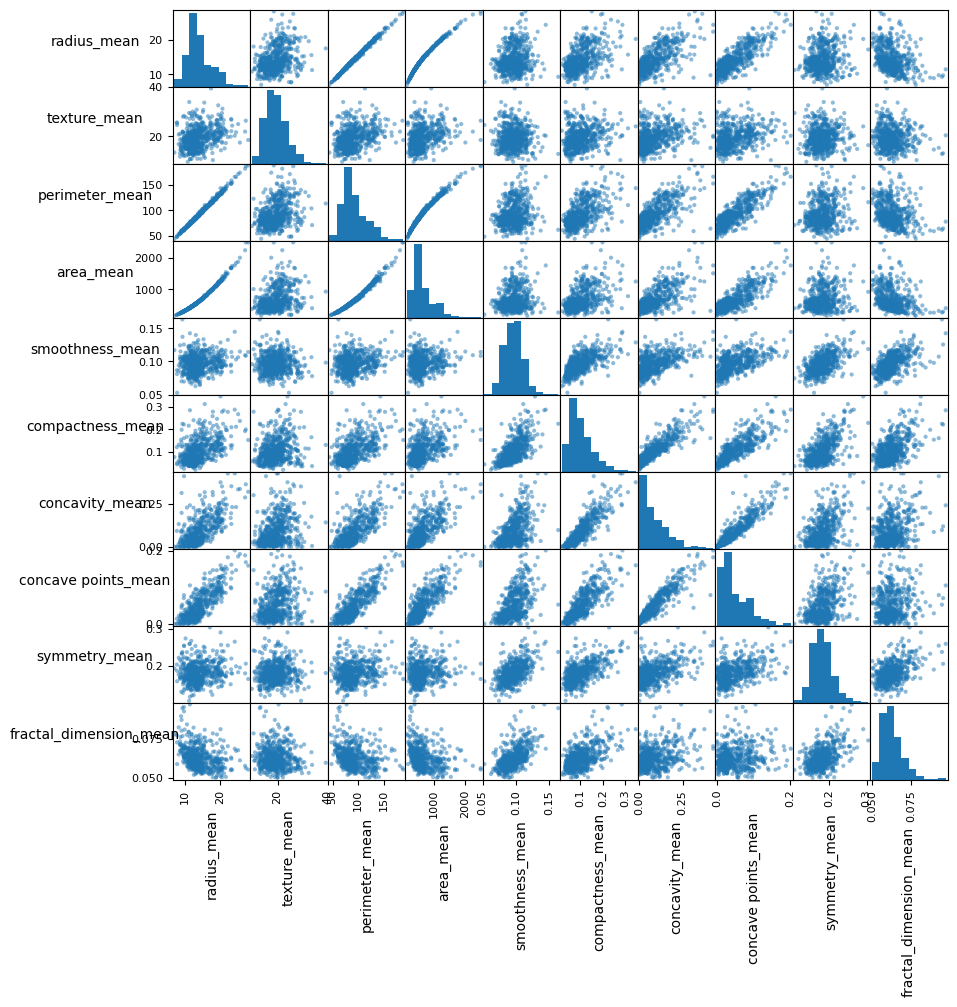

In [12]:
#Plotting the 'mean' features using the scatter_matrix.
sm_mean=scatter_matrix(df.iloc[:,1:11],figsize=(10,10))
[s.xaxis.label.set_rotation(90) for s in sm_mean.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm_mean.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm_mean.reshape(-1)]
plt.show()

## Observation:
It seems from the above plot that the **radius_mean,perimeter_mean and the area_mean** are correlated.The **compactness_mean, concavity_mean and concave points_mean** also seem correlated.We use **boxplot** to verify on this conclusion.

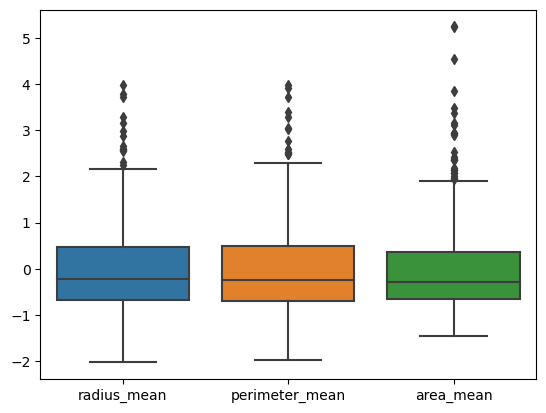

In [13]:
data=df.loc[:,['radius_mean','perimeter_mean','area_mean']]
data=sc.fit_transform(data) #standardization of the data set.
ax=sns.boxplot(data)
ax.set_xticklabels(['radius_mean','perimeter_mean','area_mean'])
plt.show()

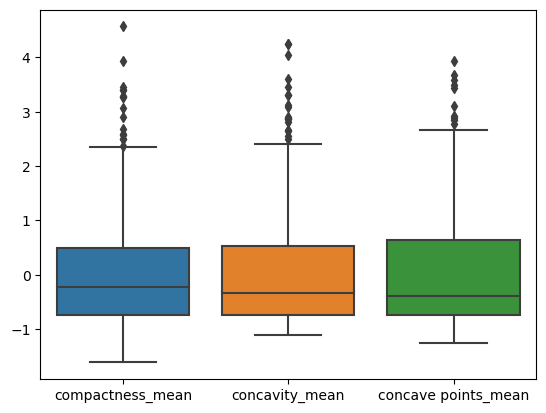

In [14]:
data_1=df.loc[:,['compactness_mean','concavity_mean','concave points_mean']]
data_1=sc.fit_transform(data_1)
ax1=sns.boxplot(data_1)
ax1.set_xticklabels(['compactness_mean','concavity_mean','concave points_mean'])
plt.show()

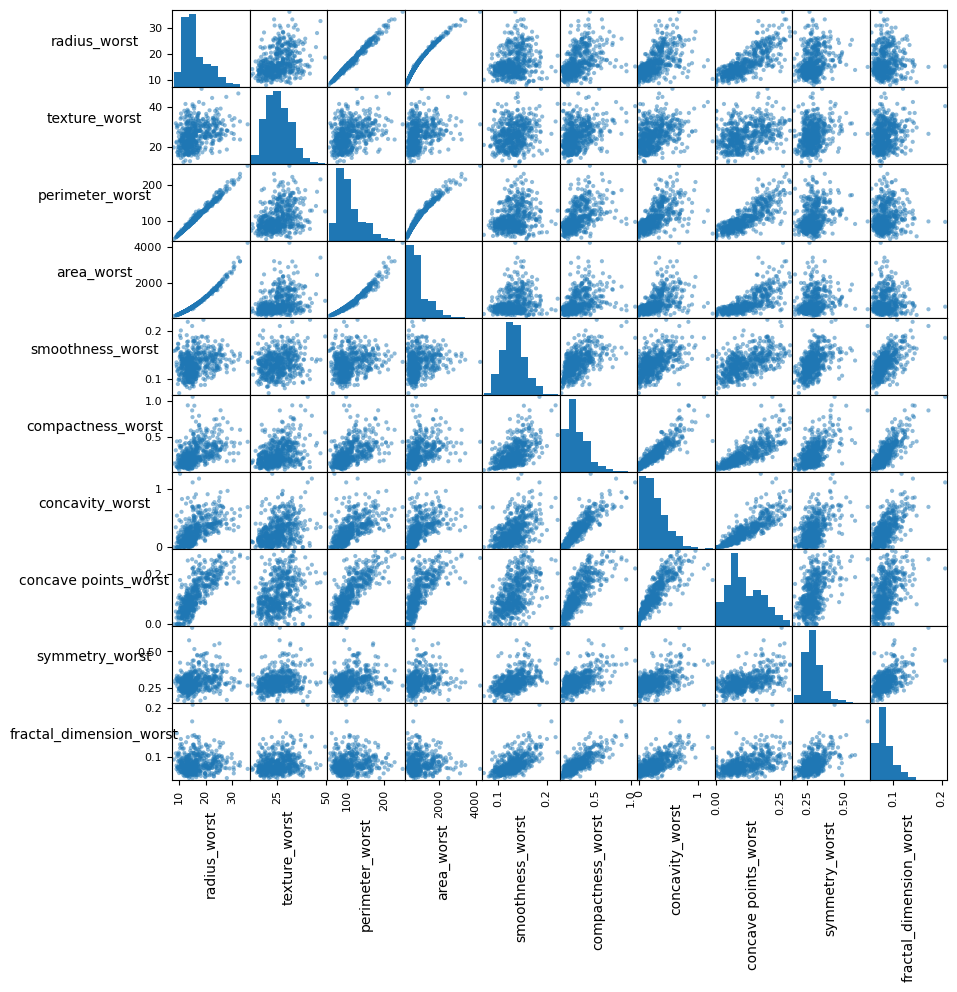

In [15]:
#Plotting the 'worst' features using the scatter_matrix.
sm_worst=scatter_matrix(df.iloc[:,21:31],figsize=(10,10))
[s.xaxis.label.set_rotation(90) for s in sm_worst.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm_worst.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm_worst.reshape(-1)]
plt.show()

## Observation:
It seems from the above plot that the **radius_worst,perimeter_worst and the area_worst** are correlated and **compactness_worst
,concavity_worst and concave points_worst** also seem correlated.We use **boxplot** to verify on this conclusion.

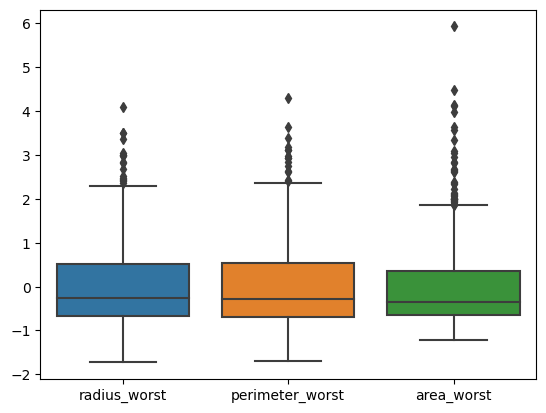

In [16]:
data_2=df.loc[:,['radius_worst','perimeter_worst','area_worst']]
data_2=sc.fit_transform(data_2) #standardization of the data set.
ax2=sns.boxplot(data_2)
ax2.set_xticklabels(['radius_worst','perimeter_worst','area_worst'])
plt.show()

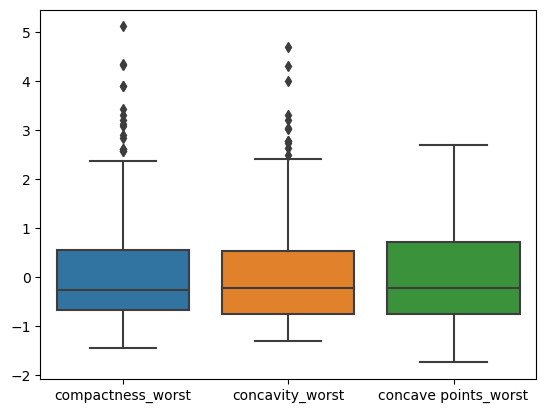

In [17]:
data_3=df.loc[:,['compactness_worst','concavity_worst','concave points_worst']]
data_3=sc.fit_transform(data_3) #standardization of the data set.
ax3=sns.boxplot(data_3)
ax3.set_xticklabels(['compactness_worst','concavity_worst','concave points_worst'])
plt.show()

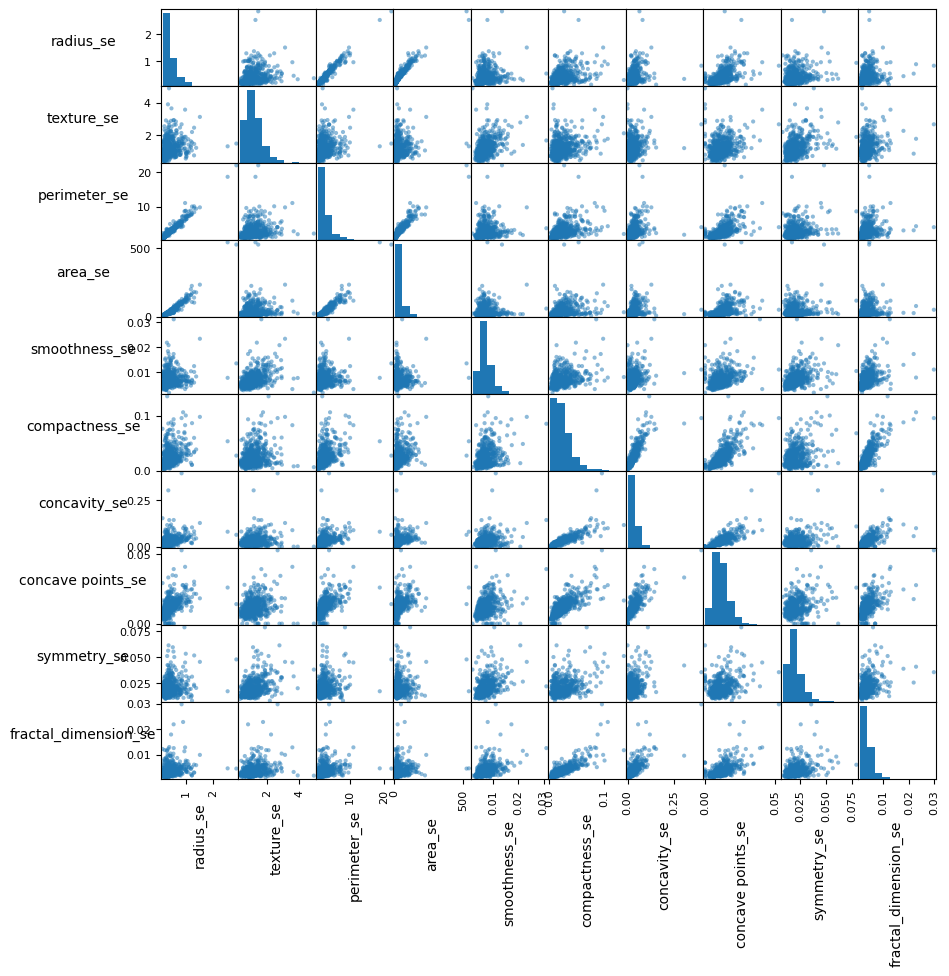

In [18]:
#Plotting the 'Standard Error' features using the scatter_matrix.
sm_se=scatter_matrix(df.iloc[:,11:21],figsize=(10,10))
[s.xaxis.label.set_rotation(90) for s in sm_se.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm_se.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm_se.reshape(-1)]
plt.show()

## Observation:
It can be concluded from the above plot that the **radius_se,perimeter_se and area_se** are correlated.The **compactness_se, concavity_se and concave points_se** also seem correlated.We use **boxplot** to verify on this conclusion.

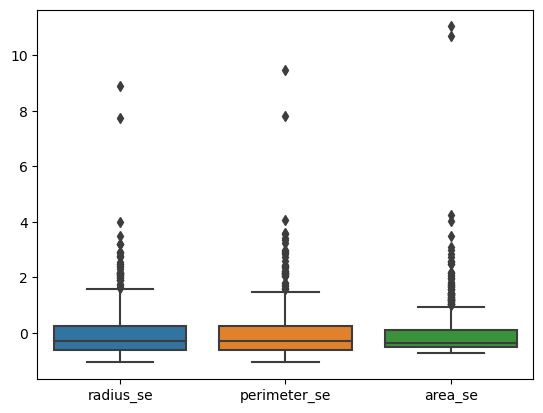

In [19]:
data_4=df.loc[:,['radius_se','perimeter_se','area_se']]
data_4=sc.fit_transform(data_4) #standardization of the data set.
ax4=sns.boxplot(data_4)
ax4.set_xticklabels(['radius_se','perimeter_se','area_se'])
plt.show()

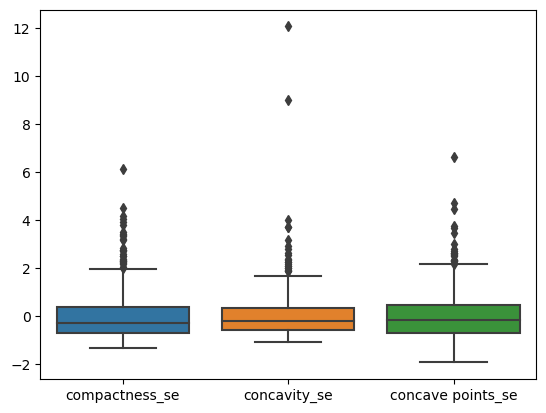

In [20]:
data_5=df.loc[:,['compactness_se','concavity_se','concave points_se']]
data_5=sc.fit_transform(data_5) #standardization of the data set.
ax5=sns.boxplot(data_5)
ax5.set_xticklabels(['compactness_se','concavity_se','concave points_se'])
plt.show()

In [21]:
df.corr() #It describes the correaltion among all the features.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


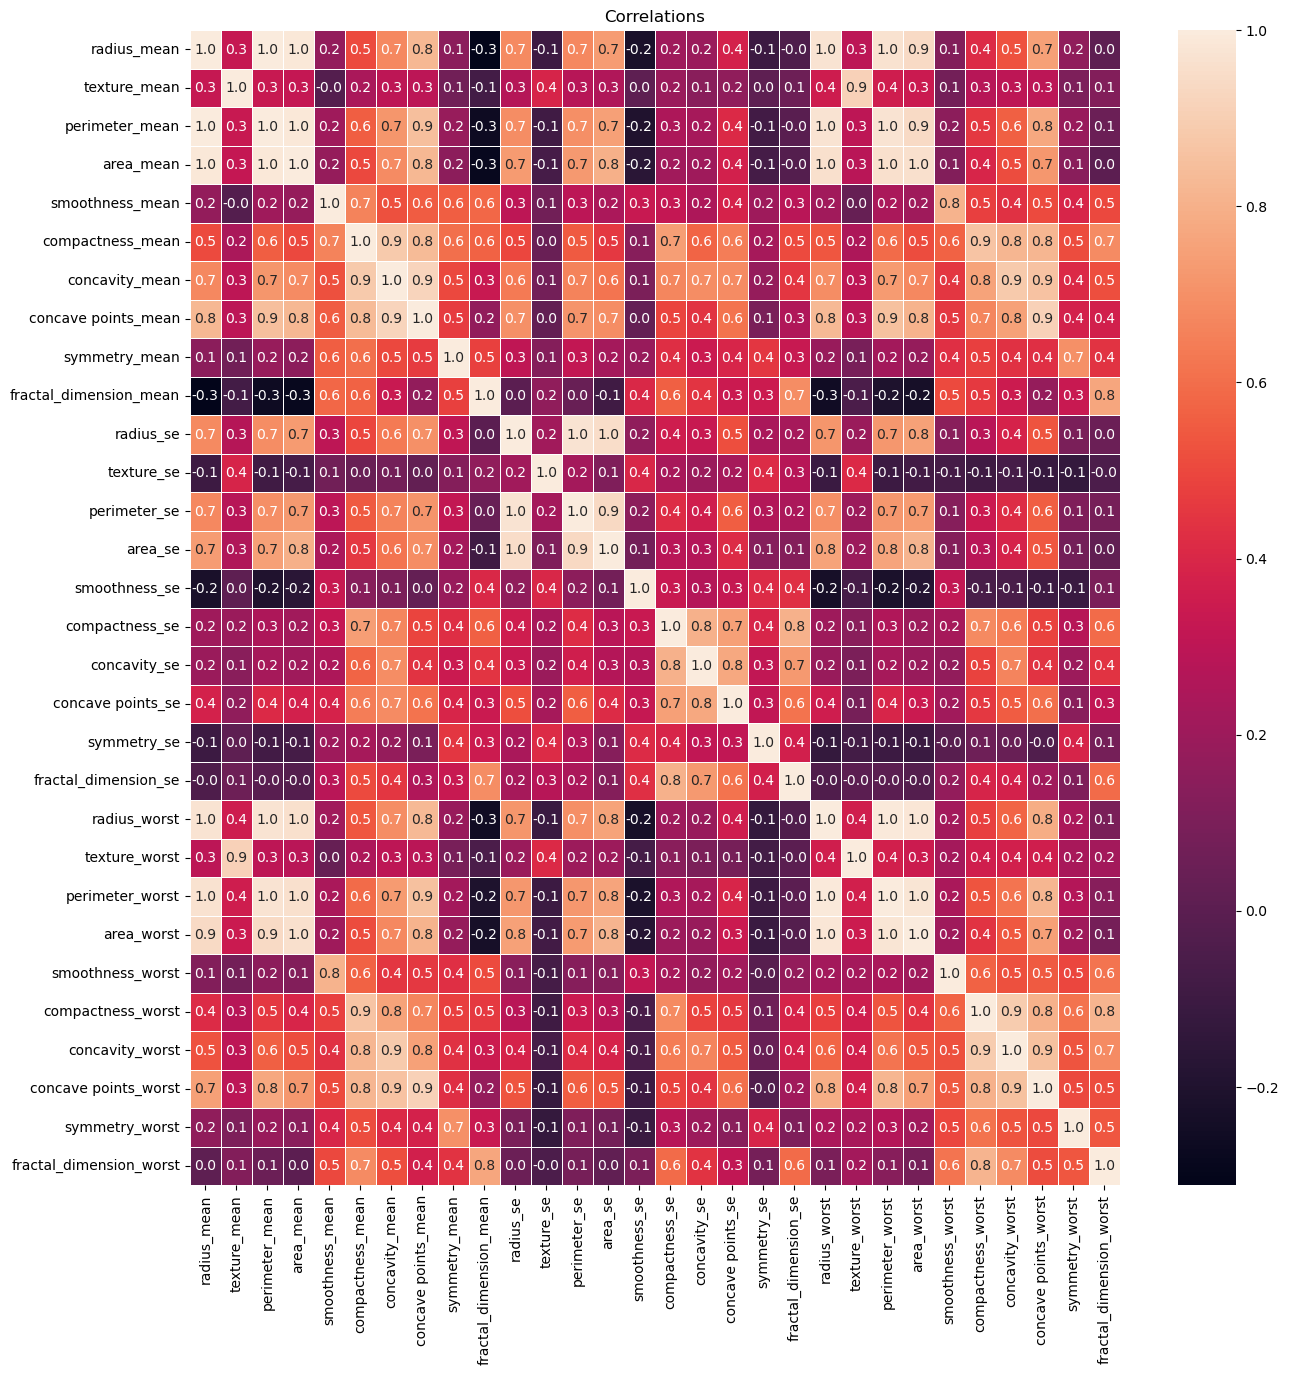

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlations")
plt.show()

## Observation:
The above heatmap shows how the featureas of the dataset are co-related with each other.<br>
According to the heatmap,**area_mean and area_worst** and **texture_mean and texture_worst** are correlated.We verify this by using the **jointplot.**

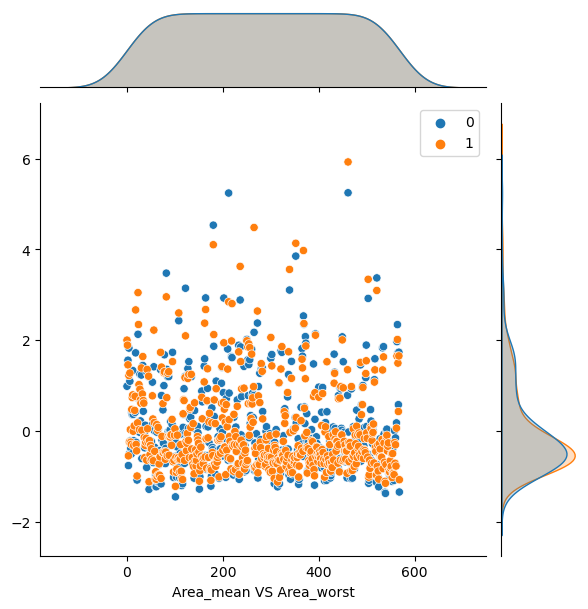

In [23]:
data_6=df.loc[:,['area_mean','area_worst']]
data_6=sc.fit_transform(data_6) #standardisation of the data.
sns.jointplot(data_6)
plt.xlabel("Area_mean VS Area_worst")
plt.show()

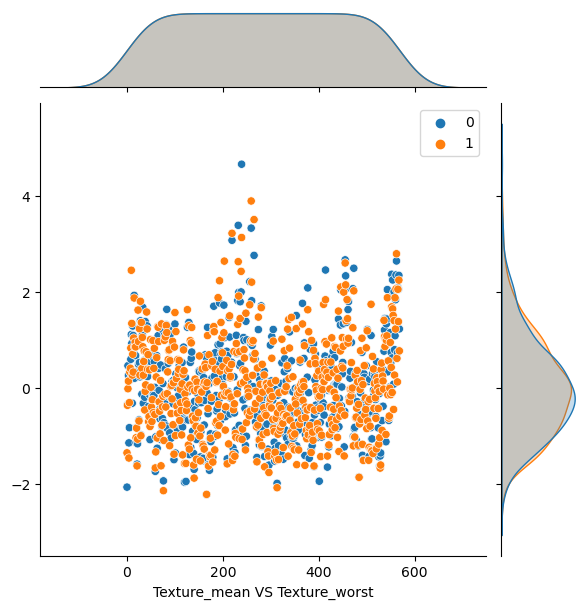

In [24]:
data_7=df.loc[:,['texture_mean','texture_worst']]
data_7=sc.fit_transform(data_7) #standardisation of the data.
sns.jointplot(data_7)
plt.xlabel("Texture_mean VS Texture_worst")
plt.show()

## Feature Selection
As it is clear from the above visualizations **radius_mean,perimeter_mean and area_mean** are correlated with each other so we use only **area_mean.Compactness_mean,concavity_mean and concave points_mean** are correlated with each other,We use **concavity_mean**. Also,**radius_worst,perimeter_worst and the area_worst** are correlated we use **area_worst** and **compactness_worst, concavity_worst and concave points_worst** are correlated we use **concavity_worst**. Apart from these,  **radius_se,perimeter_se and area_se** and **compactness_se,concavity_se and concave points_se** are correlated , we use **area_se** and **concavity_se. texture_mean and texture_worst** are correlated,we use **texture_mean. area_worst and area_mean** are correlated,we use **area_mean**.Hence,we will drop the unused features.

In [25]:
drop_list=['radius_mean','perimeter_mean','compactness_mean','concave points_mean','radius_worst','perimeter_worst',
'compactness_worst','concave points_worst','radius_se','perimeter_se','compactness_se','concave points_se',
'texture_worst','area_worst']
df=df.drop(drop_list,axis=1)

In [26]:
df #shows only the first five rows.

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,M,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,M,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,M,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


# X-Y or Input-Output Spilt
Here, we split the data into two parts: the input features and the results to be predicted. We are left with total 16 input features after the feature selection.

In [27]:
X=df.iloc[:,1:17] #input features

In [28]:
X

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


In [29]:
Y=df.diagnosis #the target value

In [30]:
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# Normalization
Here, we normalize the range of the values of input features.

In [31]:
X=sc.fit_transform(X)

In [32]:
X.reshape(-1,1)

array([[-2.07333501],
       [ 0.9843749 ],
       [ 1.56846633],
       ...,
       [-1.30583065],
       [-0.04813821],
       [-0.75120669]])

# Test and Train Split
We need to split our data into data for testing and training.Approximately, 30% of the data is used for testing purpose and the remaining for training.

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
 #If we don't pass random_state , it will produce different random data each time we run it.

# Classification Models:
I am using the **Logistic Regression** , **Random Forest**, **SVM** and **KNN** models for the classication. 

# LOGISTIC REGRESSION
It is a supervised learning classification algorithm used to predict the probability of a target variable with dichotomous nature i.e. there would be only two possible classes. It is similar to Linear Regression but instead of fitting a *regression line* we fit a **Sigmoid/Logistic Function**,which predicts two maximum values(0 or 1).

In [34]:
model= LogisticRegression()

In [35]:
model=model.fit(X_train,Y_train)

In [36]:
Y_pred=model.predict(X_test)

### Analysis:

In [37]:
print(classification_report(Y_test,Y_pred)) 

              precision    recall  f1-score   support

           B       0.99      0.97      0.98       108
           M       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [38]:
precision_score(Y_test,Y_pred,average='macro')

0.9722060957910015

In [39]:
f1_score(Y_test,Y_pred,average='macro')

0.9750292056074766

In [40]:
recall_score(Y_test,Y_pred,average='macro')

0.9781746031746031

In [41]:
accuracy_score(Y_test,Y_pred)

0.9766081871345029

#### Observation:
The accuracy score without optimization is : 0.9766

### Optimization:

In [42]:
s= ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
m=range(0,200,10)

In [43]:
search_space={'solver':s,'max_iter':m} #Creating Search Space

In [44]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=3)

In [45]:
base_model= LogisticRegression()

In [46]:
search = GridSearchCV(estimator=base_model, scoring='accuracy' ,param_grid =search_space)

In [47]:
results=search.fit(X_train[:250],Y_train[:250])

In [48]:
results.best_params_ #this will give the optimized parameters and we can use them to create our model.

{'max_iter': 10, 'solver': 'liblinear'}

In [49]:
results.best_score_

0.976

Hence, we get the best score after optimization.

# RANDOM FOREST
It is an ensemble learning method for classification,regression and other tasks that operate by constructing a multitude of decision trees at training time.For classification tasks,the output of the random forest is the class selected by most trees.

In [50]:
model_2=RandomForestClassifier(n_estimators=100)

In [51]:
model_2=model_2.fit(X_train,Y_train)

In [52]:
Y_pred_2=model_2.predict(X_test)

### Analysis:

In [53]:
print(classification_report(Y_test,Y_pred_2))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
           M       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [54]:
precision_score(Y_test,Y_pred_2,average='macro')

0.9574578277596922

In [55]:
f1_score(Y_test,Y_pred_2,average='macro')

0.9558709677419355

In [56]:
recall_score(Y_test,Y_pred_2,average='macro')

0.9543650793650793

In [57]:
accuracy_score(Y_test,Y_pred_2)

0.9590643274853801

#### Observation:
The accuracy score without optimization is : 0.9707

### Optimization:

In [58]:
n=range(10,200,5)
c=['gini','entropy','log_loss']

In [59]:
search_space_2={'n_estimators':n,'criterion':c}

In [60]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=5)

In [61]:
base_model_2= RandomForestClassifier()

In [62]:
search_2 = GridSearchCV(estimator=base_model_2, scoring='accuracy' ,param_grid =search_space_2)

In [63]:
results_2=search_2.fit(X_train[:300],Y_train[:300])

In [64]:
results_2.best_params_ 

{'criterion': 'gini', 'n_estimators': 65}

In [65]:
results_2.best_score_

0.9666666666666666

# SVM
SVM is a supervised machine learning algorithm used for both classification and regression.The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional Space that can separate the data points in different classes in the feature space.

In [66]:
model_3=SVC(kernel='linear')

In [67]:
model_3=model_3.fit(X_train,Y_train)

In [68]:
Y_pred_3=model_3.predict(X_test)

### Analysis:

In [69]:
print(classification_report(Y_test,Y_pred_3))

              precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [70]:
precision_score(Y_test,Y_pred_3,average='macro')

0.9797021028037383

In [71]:
f1_score(Y_test,Y_pred_3,average='macro')

0.9812122321919062

In [72]:
recall_score(Y_test,Y_pred_3,average='macro')

0.9828042328042328

In [73]:
accuracy_score(Y_test,Y_pred_3)

0.9824561403508771

#### Observation:
The accuracy score without optimization is : 0.9824

### Optimization:


In [74]:
k=['linear','poly','rbf','sigmoid']

In [75]:
search_space_3={'kernel':k}

In [76]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=3)

In [77]:
base_model_3=SVC()

In [78]:
search_3 = GridSearchCV(estimator=base_model_3, scoring='accuracy' ,param_grid =search_space_3)

In [79]:
results_3=search_3.fit(X_train,Y_train)

In [80]:
results_3.best_params_ 

{'kernel': 'rbf'}

In [81]:
results_3.best_score_

0.9647784810126583

# KNN
KNN is a simple,supervised machine learning algorithm that can be used for classification tasks.It is based on the idea that the observations closest to a given data point are the most 'similar' observations in a data set.

In [82]:
model_4=KNeighborsClassifier(n_neighbors=9,weights='distance',metric='minkowski',p=3)

In [83]:
model_4=model_4.fit(X_train,Y_train)

In [84]:
Y_pred_4=model_4.predict(X_test)

### Analysis:

In [85]:
print(classification_report(Y_test,Y_pred_4))

              precision    recall  f1-score   support

           B       0.93      0.96      0.95       108
           M       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [86]:
precision_score(Y_test,Y_pred_4,average='macro')

0.9303874092009685

In [87]:
f1_score(Y_test,Y_pred_4,average='macro')

0.9235469448584203

In [88]:
recall_score(Y_test,Y_pred_4,average='macro')

0.9179894179894179

In [89]:
accuracy_score(Y_test,Y_pred_4)

0.9298245614035088

#### Observation:
The accuracy score without optimization is : 0.9298

### Optimization:

In [90]:
k =list(range(7,22,2)) 
w=['uniform','distance'] 
m=['minkowski'] 
p=[1,2,3] 

In [91]:
search_space_4={'n_neighbors':k,'weights':w,'metric':m,'p':p}

In [92]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=3)

In [93]:
base_model_4= KNeighborsClassifier()

In [94]:
search_4 = GridSearchCV(estimator=base_model_4, scoring='accuracy' ,param_grid =search_space_4)

In [95]:
results_4=search_4.fit(X_train,Y_train)

In [96]:
results_4.best_params_ 

{'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [97]:
results_4.best_score_

0.9547468354430378

# Conclusion:
**In conclusion, all the four models achieved a high accuracy of more than 95% for breast cancer diagnosis. Also, it can be concluded that, among all the models, the SVM model provided the best result (more than 98% accuracy) to our dataset.**